In [4]:
# This investigates the association of an employee choosing to see treatment
# for a mental health condition (treatment) based on the state in which they
# live (state), their gender (gender), and their family history of mental
# illness (family_history),
# Develop computational methods to investigate the association between an
# employee's state of residence, gender, family history of mental illness and
# their decision to seek treatment for a mental health condition. 
import os
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [5]:
os.chdir("/Users/melle/OneDrive/Desktop/Projects/Python")
os.getcwd()

'C:\\Users\\melle\\OneDrive\\Desktop\\Projects\\Python'

In [6]:
# Read in files
all_files = os.listdir('./')

In [7]:
# Shows all the files in the Python folder
all_files

['Output', 'Output survey.clean', 'RawData.csv']

In [8]:
# Rename file to data
survey = 'RawData.csv'
data = pd.read_csv(survey)

In [9]:
# Returns the first 5 rows if a number is not specified
data.head

<bound method NDFrame.head of              Timestamp  Age  Gender         Country state self_employed  \
0      8/27/2014 11:29   37  Female   United States    IL           NaN   
1      8/27/2014 11:29   44       M   United States    IN           NaN   
2      8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3      8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4      8/27/2014 11:30   31    Male   United States    TX           NaN   
...                ...  ...     ...             ...   ...           ...   
1254   9/12/2015 11:17   26    male  United Kingdom   NaN            No   
1255    9/26/2015 1:07   32    Male   United States    IL            No   
1256   11/7/2015 12:36   34    male   United States    CA            No   
1257  11/30/2015 21:25   46       f   United States    NC            No   
1258    2/1/2016 23:04   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \


In [10]:
data.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,884,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,8/27/2014 12:31,NaN,Male,United States,CA,No,No,Yes,Sometimes,25-Jun,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Chose to work with Gender and treatment to answer our research question
data.groupby(['Gender','treatment']).mean()

C:\Users\melle\AppData\Local\Temp\ipykernel_117516\2229098925.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Gender','treatment']).mean()


,,Age
Gender,treatment,
A little about you,Yes,8.000000e+00
Agender,Yes,2.100000e+01
All,Yes,1.000000e+11
Androgyne,Yes,2.800000e+01
Cis Female,Yes,2.700000e+01
...,...,...
p,Yes,-1.000000e+00
queer,Yes,2.600000e+01
queer/she/they,Yes,3.000000e+01


In [12]:
# Returns the number of times a specified values appreas in the string
data.groupby('treatment').count()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
treatment,,,,,,,,,,,,,,,,,,,,,
No,622,622,622,622,337,613,622,362,622,622,...,622,622,622,622,622,622,622,622,622,58
Yes,637,637,637,637,407,628,637,633,637,637,...,637,637,637,637,637,637,637,637,637,106


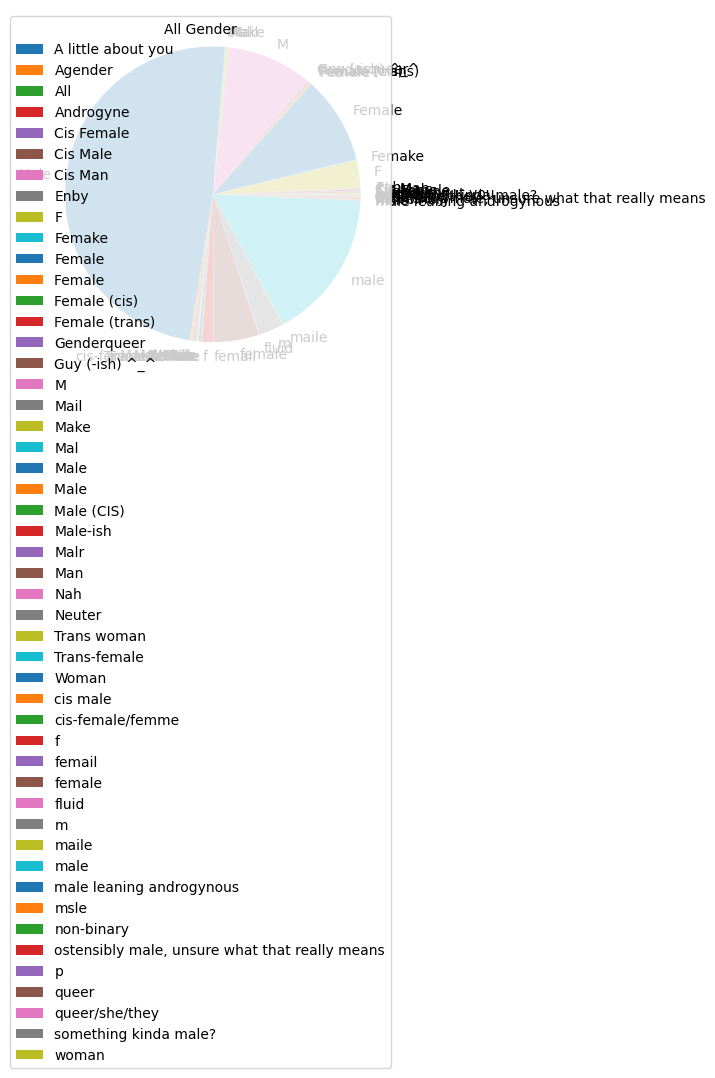

In [13]:
# Graph all genders before cleaning data for visuals
all_gender = data.groupby('Gender').size()
all_gender.plot(kind = 'pie');
plt.legend(title = "All Gender")

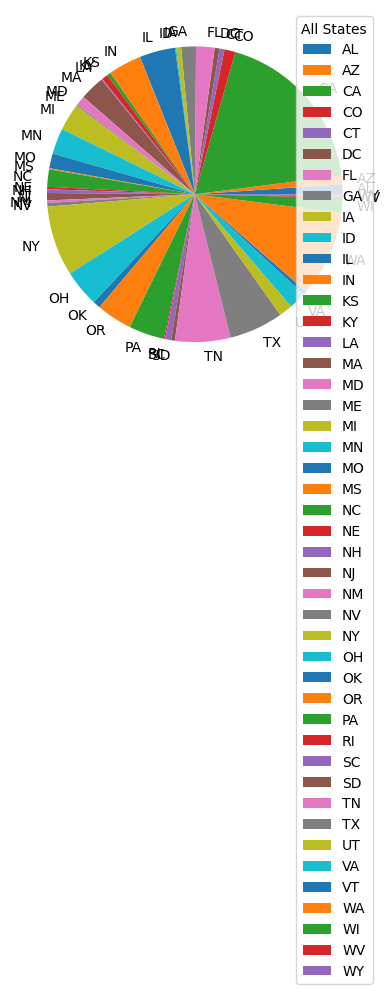

In [14]:
# Graph all states before putting them into regions
all_states = data.groupby('state').size()
all_states.plot(kind = 'pie');
plt.legend(title = 'All States')

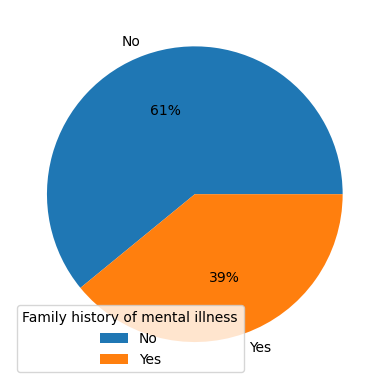

In [15]:
# Graph % of those who have history of mental illness
all_familyhistory = data.groupby('family_history').size()
all_familyhistory.plot(kind = 'pie', autopct = '%0.0f%%')
plt.legend(title = "Family history of mental illness")

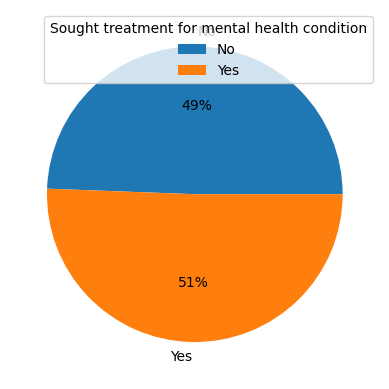

In [16]:
# Graph of those who sought treatment for mental health condition
all_treatment = data.groupby('treatment').size()
all_treatment.plot(kind = 'pie', autopct = '%0.0f%%')
plt.legend(title = "Sought treatment for mental health condition")

In [17]:
# Number of samples before cleaning
print ('Number of samples before cleaning: ', data.shape[0], '\nNumber of features before cleaning: ', data.shape[1])

Number of samples before cleaning:  1259 
Number of features before cleaning:  27


In [18]:
# Number of all countries before isolating USA
print('All countries: \n')
data.groupby('Country').size()


All countries: 



Country
Australia                  21
Austria                     3
Bahamas, The                1
Belgium                     6
Bosnia and Herzegovina      1
Brazil                      6
Bulgaria                    4
Canada                     72
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     3
France                     13
Georgia                     1
Germany                    45
Greece                      2
Hungary                     1
India                      10
Ireland                    27
Israel                      5
Italy                       7
Japan                       1
Latvia                      1
Mexico                      3
Moldova                     1
Netherlands                27
New Zealand                 8
Nigeria                     1
Norway                      1
Philippines                 1
Po

In [19]:
# Isolate USA 
indexNames = data[data['Country']!= 'United States'].index

In [20]:
data.drop(indexNames, inplace = True)

In [21]:
# Number of USA sample
data.groupby('Country').size()

Country
United States    751
dtype: int64

In [22]:
# Double check USA sample size
data.groupby('Country').size().sum()

751

In [23]:
print ('Number of samples in United States: ', data.shape[0], '\nNumber of features in United States: ', data.shape[1])

Number of samples in United States:  751 
Number of features in United States:  27


In [24]:
data.groupby('Gender').size().sum()

751

In [25]:
print ('Number of samples in United States: ', data.shape[0], '\nNumber of features in United States: ', data.shape[1])

Number of samples in United States:  751 
Number of features in United States:  27


In [26]:
# Clean Gender data and categorize them into M=Male, F=Female, LGBTQ+ and Other
gender_recode = {'Female': 'F',
'Femake': 'F','Female (cis)': 'F', 'Woman' : 'F', 'cis-female/femme': 'F',
'f': 'F', 'femail': 'F', 'female': 'F', 'woman': 'F', 'Cis Female': 'F', 'F':'F', 
'Cis Male': 'M', 'Mail': 'M', 'Make': 'M', 'Male (CIS)': 'M', 'Man': 'M', 
'Male-ish' : 'M', 'cis male': 'M',
'm' : 'M', 'maile' : 'M', 'male':'M', 'msle' : 'M', 'M':'M', 'Male': 'M',
'Female (trans)' : 'LGBTQ+', 'Genderqueer' : 'LGBTQ+',
'Trans woman': 'LGBTQ+', 'non-binary' : 'LGBTQ+', 'queer/she/they' : 'LGBTQ+', 'Trans-female' : 'LGBTQ+', 'p' : 'Other', 'Nah' : 'Other'}

data['Gender'] = data.Gender.map(gender_recode)

In [27]:
# Gender count by category
data.groupby('Gender').size()

Gender
F         178
LGBTQ+      7
M         561
Other       2
dtype: int64

In [28]:
# Total gender count
data.groupby('Gender').size().sum()

748

In [29]:
 # Counts of each state (# of elements in the array)
data.groupby('state').size()

state
AL      8
AZ      7
CA    138
CO      9
CT      4
DC      4
FL     15
GA     12
IA      4
ID      1
IL     28
IN     27
KS      3
KY      5
LA      1
MA     20
MD      7
ME      1
MI     22
MN     21
MO     12
MS      1
NC     14
NE      2
NH      3
NJ      6
NM      2
NV      3
NY     56
OH     30
OK      6
OR     29
PA     29
RI      1
SC      5
SD      3
TN     45
TX     44
UT     10
VA     14
VT      3
WA     70
WI     12
WV      1
WY      2
dtype: int64

In [30]:
 # State sample size
data.groupby('state').size().sum()

740

In [31]:
# Recode states into regions
state_recode = {'AL': 'S', 'CA': 'W',
'CO': 'W', 'DC' : 'S', 'FL': 'S',
'GA': 'S', 'IL': 'MW', 'IN': 'MW', 'NM' : 'W', 'NV' : 'W',
'KS': 'MW', 'KY': 'S', 'MA': 'NE', 'MD': 'S', 
'MI': 'MW', 'MN': 'MW', 'MO': 'MW', 'NC': 'S', 
'NJ': 'NE', 'NY' : 'NE', 'OH': 'MW', 'OK': 'S',
'OR' : 'W', 'PA' : 'NE', 'SD':'MW', 'TN' : 'S', 'TX' : 'S',
'UT' : 'W', 'VA' : 'S', 'VT': 'NE', 'WA': "W",
'AZ' : 'W', 'CT' : 'NE', 'LA' : 'S',
'MS': 'S', 'WI' : 'MW',
'IA': 'MW', 'ID':'W', 'ME':'NE','NE':'MW', 'NH':'NE', 'RI':'NE', 'SC':'S', 'WV':'S', 'WY':'W'}

data['state'] = data.state.map(state_recode)

In [32]:
# States by the four regions
data.groupby('state').size()

state
MW    164
NE    123
S     182
W     271
dtype: int64

In [33]:
# Sanity check for state sample size
data.groupby('state').size().sum()

740

In [34]:
# Isolate family history
data.groupby('family_history').size()

family_history
No     421
Yes    330
dtype: int64

In [35]:
# Recode 1 = Yes and 0 = No
family_history_num = {'No' : '0', 'Yes' : '1'}
data['family_history'] = data.family_history.map(family_history_num)

In [36]:
# Check recode and sample size
data.groupby('family_history').size()

family_history
0    421
1    330
dtype: int64

In [37]:
# Isolate treatment
data.groupby('treatment').size()

treatment
No     341
Yes    410
dtype: int64

In [38]:
# Recode 1 = Yes and 0 = No
treatment_num = {'No' : '0', 'Yes' : '1'}
data['treatment'] = data.treatment.map(treatment_num)

In [39]:
#Check recode and sample size
data.groupby('treatment').size()

treatment
0    341
1    410
dtype: int64

In [40]:
data.groupby('Gender').size()

Gender
F         178
LGBTQ+      7
M         561
Other       2
dtype: int64

In [41]:
data.groupby('state').size()

state
MW    164
NE    123
S     182
W     271
dtype: int64

In [42]:
data.groupby('family_history').size()

family_history
0    421
1    330
dtype: int64

In [43]:
data = data[data['state'].str.contains("nan") == False]
data = data[data['treatment'].str.contains("nan") == False]
data = data[data['Gender'].str.contains("nan") == False]
data = data[data['family_history'].str.contains("nan") == False]

In [44]:
data.groupby('state').size()

state
MW    164
NE    122
S     182
W     269
dtype: int64

In [45]:
data.groupby('treatment').size()

treatment
0    334
1    403
dtype: int64

In [46]:
data.groupby('Gender').size()

Gender
F         176
LGBTQ+      7
M         552
Other       2
dtype: int64

In [55]:
data.groupby('family_history').size()

family_history
0    415
1    322
dtype: int64

In [56]:
i_out = data.replace('survey','survey.clean')
i_out = '../Output survey.clean'
data.to_csv(i_out, index=False, sep='\t')

In [57]:
os.chdir("/Users/melle/OneDrive/Desktop/Projects/Python/Output")
os.getcwd()

'C:\\Users\\melle\\OneDrive\\Desktop\\Projects\\Python\\Output'

In [58]:
new = 'survey.clean'
data_clean = pd.read_csv(new, sep='\t')

In [59]:
data_clean.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,F,United States,MW,NaN,0,1,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,MW,NaN,0,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:30,31,M,United States,S,NaN,0,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
3,8/27/2014 11:31,33,M,United States,S,NaN,1,0,Sometimes,25-Jun,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
4,8/27/2014 11:31,35,F,United States,MW,NaN,1,1,Sometimes,5-Jan,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


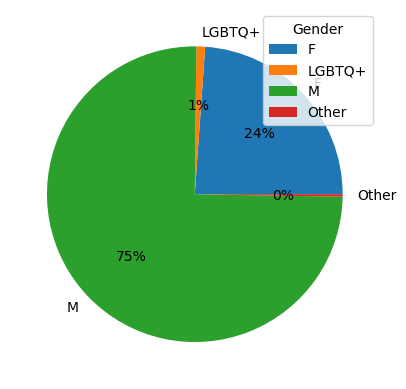

In [60]:
c_gender = data_clean.groupby('Gender').size()
c_gender.plot(kind = 'pie', autopct = '%0.0f%%');
plt.legend(title = "Gender")

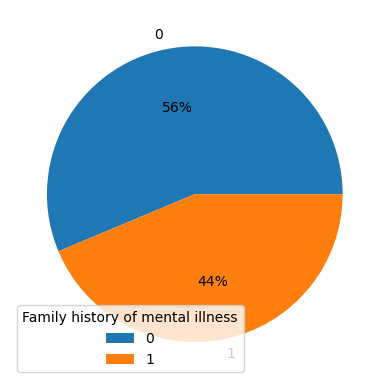

In [61]:
c_familyH = data_clean.groupby('family_history').size()
c_familyH.plot(kind = 'pie', autopct = '%0.0f%%');
plt.legend(title = "Family history of mental illness")

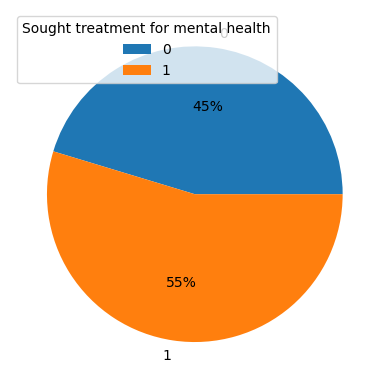

In [62]:
c_treatment = data_clean.groupby('treatment').size()
c_treatment.plot(kind = 'pie', autopct = '%0.0f%%');
plt.legend(title = "Sought treatment for mental health")

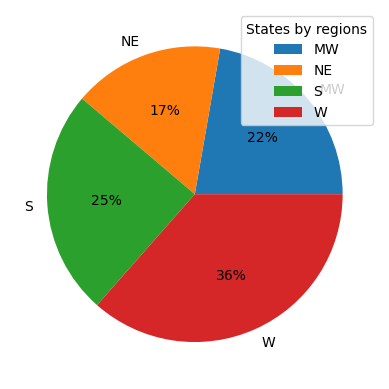

In [63]:
c_state = data_clean.groupby('state').size()
c_state.plot(kind = 'pie', autopct = '%0.0f%%');
plt.legend(title = "States by regions")

In [64]:
# cross tab between treatment and gender
data_crosstab = pd.crosstab(data_clean['treatment'], data_clean['Gender'])

In [65]:
chisq = stats.chi2_contingency(data_crosstab)
print('\n\n' ,chisq)



 Chi2ContingencyResult(statistic=28.36919970360129, pvalue=3.0383718820860237e-06, dof=3, expected_freq=array([[ 79.76119403,   3.17232022, 250.16010855,   0.9063772 ],
       [ 96.23880597,   3.82767978, 301.83989145,   1.0936228 ]]))


In [66]:
# cross tab between treatment and family history
data_crosstab = pd.crosstab(data_clean['treatment'], data_clean['family_history'])

In [67]:
chisq = stats.chi2_contingency(data_crosstab)
print('\n\n' ,chisq)



 Chi2ContingencyResult(statistic=101.1838449407637, pvalue=8.383025646464195e-24, dof=1, expected_freq=array([[188.07327001, 145.92672999],
       [226.92672999, 176.07327001]]))


In [68]:
# cross tab between treatment and state
data_crosstab = pd.crosstab(data_clean['treatment'], data_clean['state'])

In [69]:
# Chi square to observe the significance between the variables.
chisq = stats.chi2_contingency(data_crosstab)
print('\n\n' ,chisq)



 Chi2ContingencyResult(statistic=8.483123301328945, pvalue=0.03701415789911934, dof=3, expected_freq=array([[ 74.3229308 ,  55.2890095 ,  82.48032564, 121.90773406],
       [ 89.6770692 ,  66.7109905 ,  99.51967436, 147.09226594]]))


In [70]:
# Logistic Regression
lg_reg = data_clean[['Gender', 'state', 'family_history', 'treatment']]

In [71]:
lg_reg.head()

,Gender,state,family_history,treatment
0,F,MW,0,1
1,M,MW,0,0
2,M,S,0,0
3,M,S,1,0
4,F,MW,1,1


In [72]:
# Gender: Female is baseline and there is a difference on who chooses treatment
# based on the Pvalue. Males are less less likely to seek treatment
# State: Midwest is baseline and due to negative coefficient people in the 
# south are less likely to seek treatment for mental health conditions
# Family History: Due to postive coefficient people with family history of mental
# illness are more likely to seek treatment.
# Limitations: Whitespace issue with gender categories and removing "nan" from data.
# 
import statsmodels.formula.api as smf
model = smf.logit('treatment ~ Gender + family_history + state', data = lg_reg).fit()
model.summary()

         Current function value: 0.598353
         Iterations: 35


C:\Users\melle\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              treatment   No. Observations:                  737
Model:                          Logit   Df Residuals:                      729
Method:                           MLE   Df Model:                            7
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.1313
Time:                        19:19:34   Log-Likelihood:                -440.99
converged:                      False   LL-Null:                       -507.61
Covariance Type:            nonrobust   LLR p-value:                 1.311e-25
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3462      0.252      1.374      0.170      -0.148       0.840
Gender[T.LGBTQ+]    -0.0131      0.921     -0.014      0.989      -1.818       1.791
Gender[T.M]         -0.8497      0.202     -4.209      0.000      -1.245      -0.454
Gender[T.Other]     20.1102   3.85e+04      0.001      1.000   -7.55e+04    7.55e+04
state[T.NE]         -0.3738      0.264     -1.418      0.156      -0.890       0.143
state[T.S]          -0.4144      0.237     -1.751      0.080      -0.878       0.049
state[T.W]           0.0317      0.220      0.144      0.885      -0.400       0.464
family_history       1.5700      0.168      9.357      0.000       1.241       1.899
====================================================================================
"""